# Problem Statement

We know Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

* Expensive in terms of both money and time to train new employees.
* Loss of experienced employees
* Impact in productivity
* Impact profit

# Solution Approach
#### To predict if an employee is going to resign(leaving) or not.
In this case study, a dataset was sourced from which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit.

#This can happen for many reasons:

* Employees looking for better opportunities.
* A negative working environment.
* Bad management
* Sickness of an employee (or even death)
* Excessive working hours

# About the data

Age- Age of the employee

Attrition- Whether the employee left in the previous year or not

BusinessTravel- How frequently the employees travelled for business purposes in the last year

Department- Department in company

Education-Education Level
-             'Below College'
-             'College'
-             'Bachelor'
-             'Master'
-             'Doctor'

EducationField- Field of education

EmployeeNumber- Employee number/id

EnvironmentSatisfaction- Work Environment Satisfaction Level
-                           'Low'
-                           'Medium'
-                           'High'
-                           'Very High'

Gender- Gender of employee**

JobRole- Name of job role in company

JobSatisfaction- Job Satisfaction Level
-                     'Low'
-                     'Medium'
-                     'High'
-                     'Very High'

MaritalStatus- Marital status of the employee

MonthlyIncome- Monthly income in rupees per month

NumCompaniesWorked- Total number of companies the employee has worked for

OverTime- Whether employee doing overtime or not

PerformanceRating- Performance rating for last year
-                     'Low'
-                     'Good'
-                     'Excellent'
-                     'Outstanding'

TotalWorkingYears- Total number of years the employee has worked so far

TrainingTimesLastYear- Number of times training was conducted for this employee last year

WorkLifeBalance- Work life balance level
-                     'Bad'
-                     'Good'
-                     'Better'
-                     'Best'

YearsAtCompany- Total number of years spent at the company by the employee

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [3]:
# To Predicting the attrition of your valuable employees.

att = pd.read_csv(r'C:\Users\Akash\Documents\Attrition_dataset.csv')

In [4]:
att.shape

(1470, 24)

In [5]:
att.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PerformanceRating,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,2,Life Sciences,1,1,2,Female,Sales Executive,4,Single,5993,8,Y,Yes,3,80,8,1,6,4,0
1,49,No,Travel_Frequently,Research & Development,1,Life Sciences,1,2,3,Male,Research Scientist,2,Married,5130,1,Y,No,4,80,10,3,10,7,1
2,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,4,Male,Laboratory Technician,3,Single,2090,6,Y,Yes,3,80,7,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,4,Life Sciences,1,5,4,Female,Research Scientist,3,Married,2909,1,Y,Yes,3,80,8,3,8,7,3
4,27,No,Travel_Rarely,Research & Development,1,Medical,1,7,1,Male,Laboratory Technician,2,Married,3468,9,Y,No,3,80,6,3,2,2,2


**The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.**

# Understanding the Data

In [6]:
att.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
OverTime                   0
PerformanceRating          0
StandardHours              0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

**Here we can see that we don't have null values**

In [7]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EmployeeCount            1470 non-null   int64 
 7   EmployeeNumber           1470 non-null   int64 
 8   EnvironmentSatisfaction  1470 non-null   int64 
 9   Gender                   1470 non-null   object
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  NumCompaniesWorked       1470 non-null  

**we can see there are 2 format of data types:**

**object: Object format means variables are categorical.
Categorical variables in our dataset are : 9.**

**int64: It represents the integer variables.
Numeric variables in our dataset are : 15.**

# Exploratory Data Analysis (EDA)

**In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.**

**For categorical features, we can use frequency table or bar plots which will calculate the number of each category in a particular variable.**

**For numerical features, probability density plots can be used to look at the distribution of the variable.**

In [8]:
att.describe()

,Age,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,1.0,1024.865306,2.721769,2.728571,6502.931293,2.693197,3.153741,80.0,11.279592,2.761224,7.008163,4.229252,2.187755
std,9.135373,1.024165,0.0,602.024335,1.093082,1.102846,4707.956783,2.498009,0.360824,0.0,7.780782,0.706476,6.126525,3.623137,3.222430
min,18.000000,1.000000,1.0,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,80.0,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,491.250000,2.000000,2.000000,2911.000000,1.000000,3.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,3.000000,1.0,1020.500000,3.000000,3.000000,4919.000000,2.000000,3.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,4.000000,1.0,1555.750000,4.000000,4.000000,8379.000000,4.000000,3.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,5.000000,1.0,2068.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,80.0,40.000000,4.000000,40.000000,18.000000,15.000000


In [9]:
for column in att.columns:
    print(f"{column}: Number of unique values {att[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
Department: Number of unique values 3
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PerformanceRating: Number of unique values 2
StandardHours: Number of unique values 1
TotalWorkingYears: Number of unique values 40
WorkLifeBalance: Number of unique values 4
YearsAtCompany: Number of unique values 37
YearsInCurrentRole: Number of unique values 19
YearsSinceLastPromotion: Number of unique values 16


**We notice that 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.**


**Also We notice that 'EmployeeCount', 'Over18' and 'StandardHours' has only one values. This features also aren't useful for us, So we are going to drop those columns.**

In [10]:
att.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis="columns", inplace=True)

# Categorical Features

In [11]:
att['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
att['Attrition'].value_counts()/len(att)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

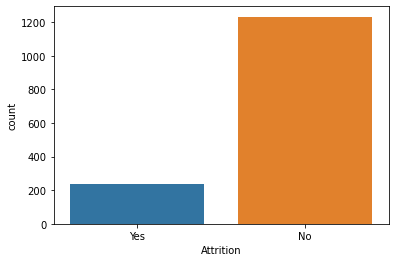

In [13]:
sns.countplot(x= 'Attrition',data=att)

**Around 84% of employees did not quit the organization while 16% did leave the organization.**

## Our data is very imbalanced.

In [14]:
categorical_col = []
for column in att.columns:
    if att[column].dtype == object and len(att[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {att[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [15]:
att['Attrition'] = att.Attrition.astype("category").cat.codes

## Data Visualisation

<Figure size 2160x2160 with 0 Axes>

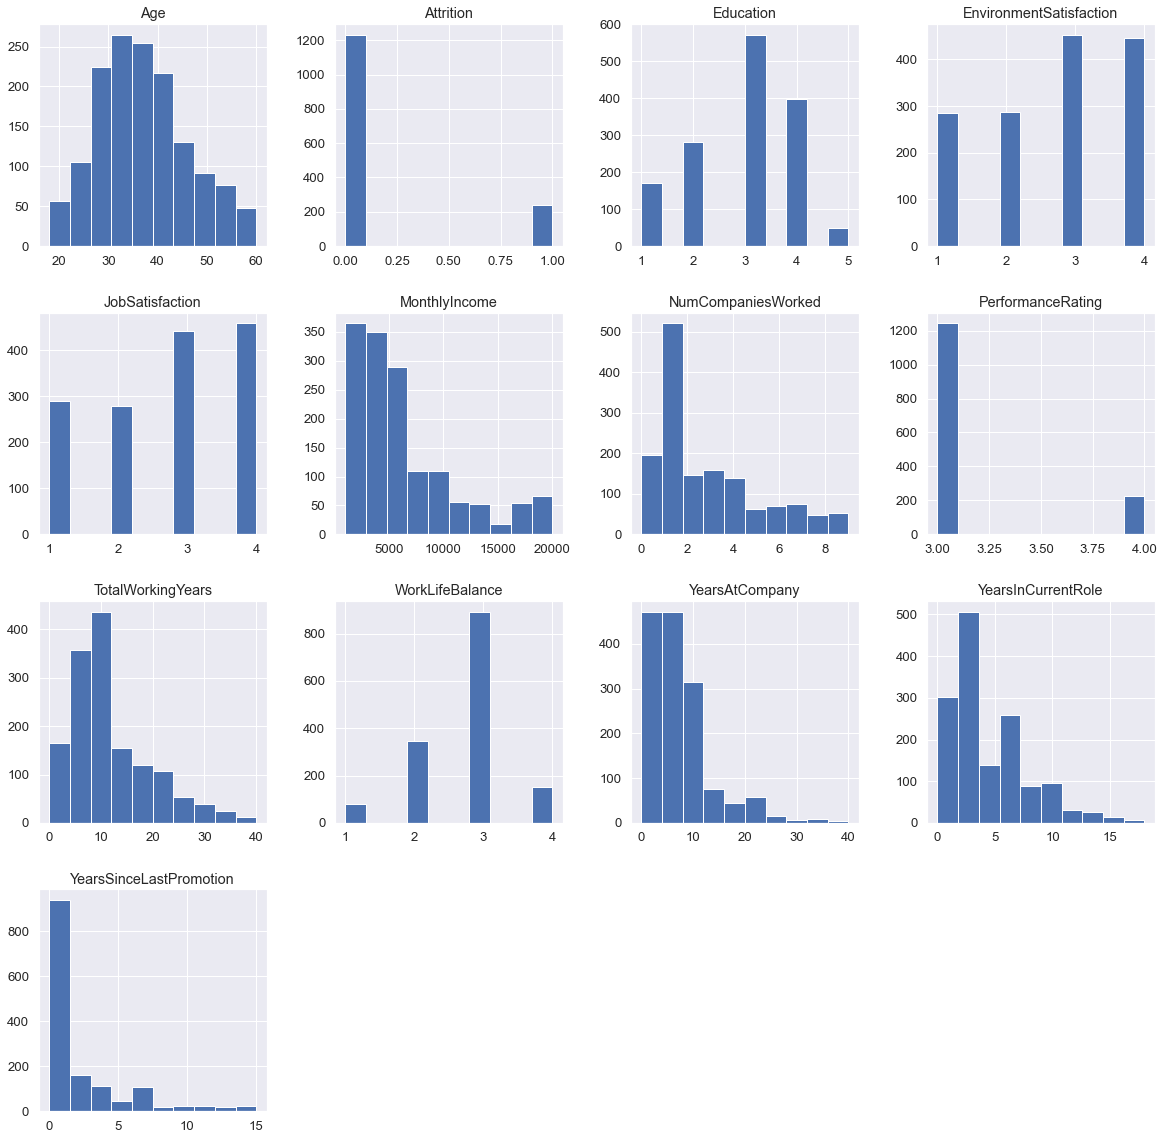

In [16]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

att.hist(figsize=(20,20))
plt.show()

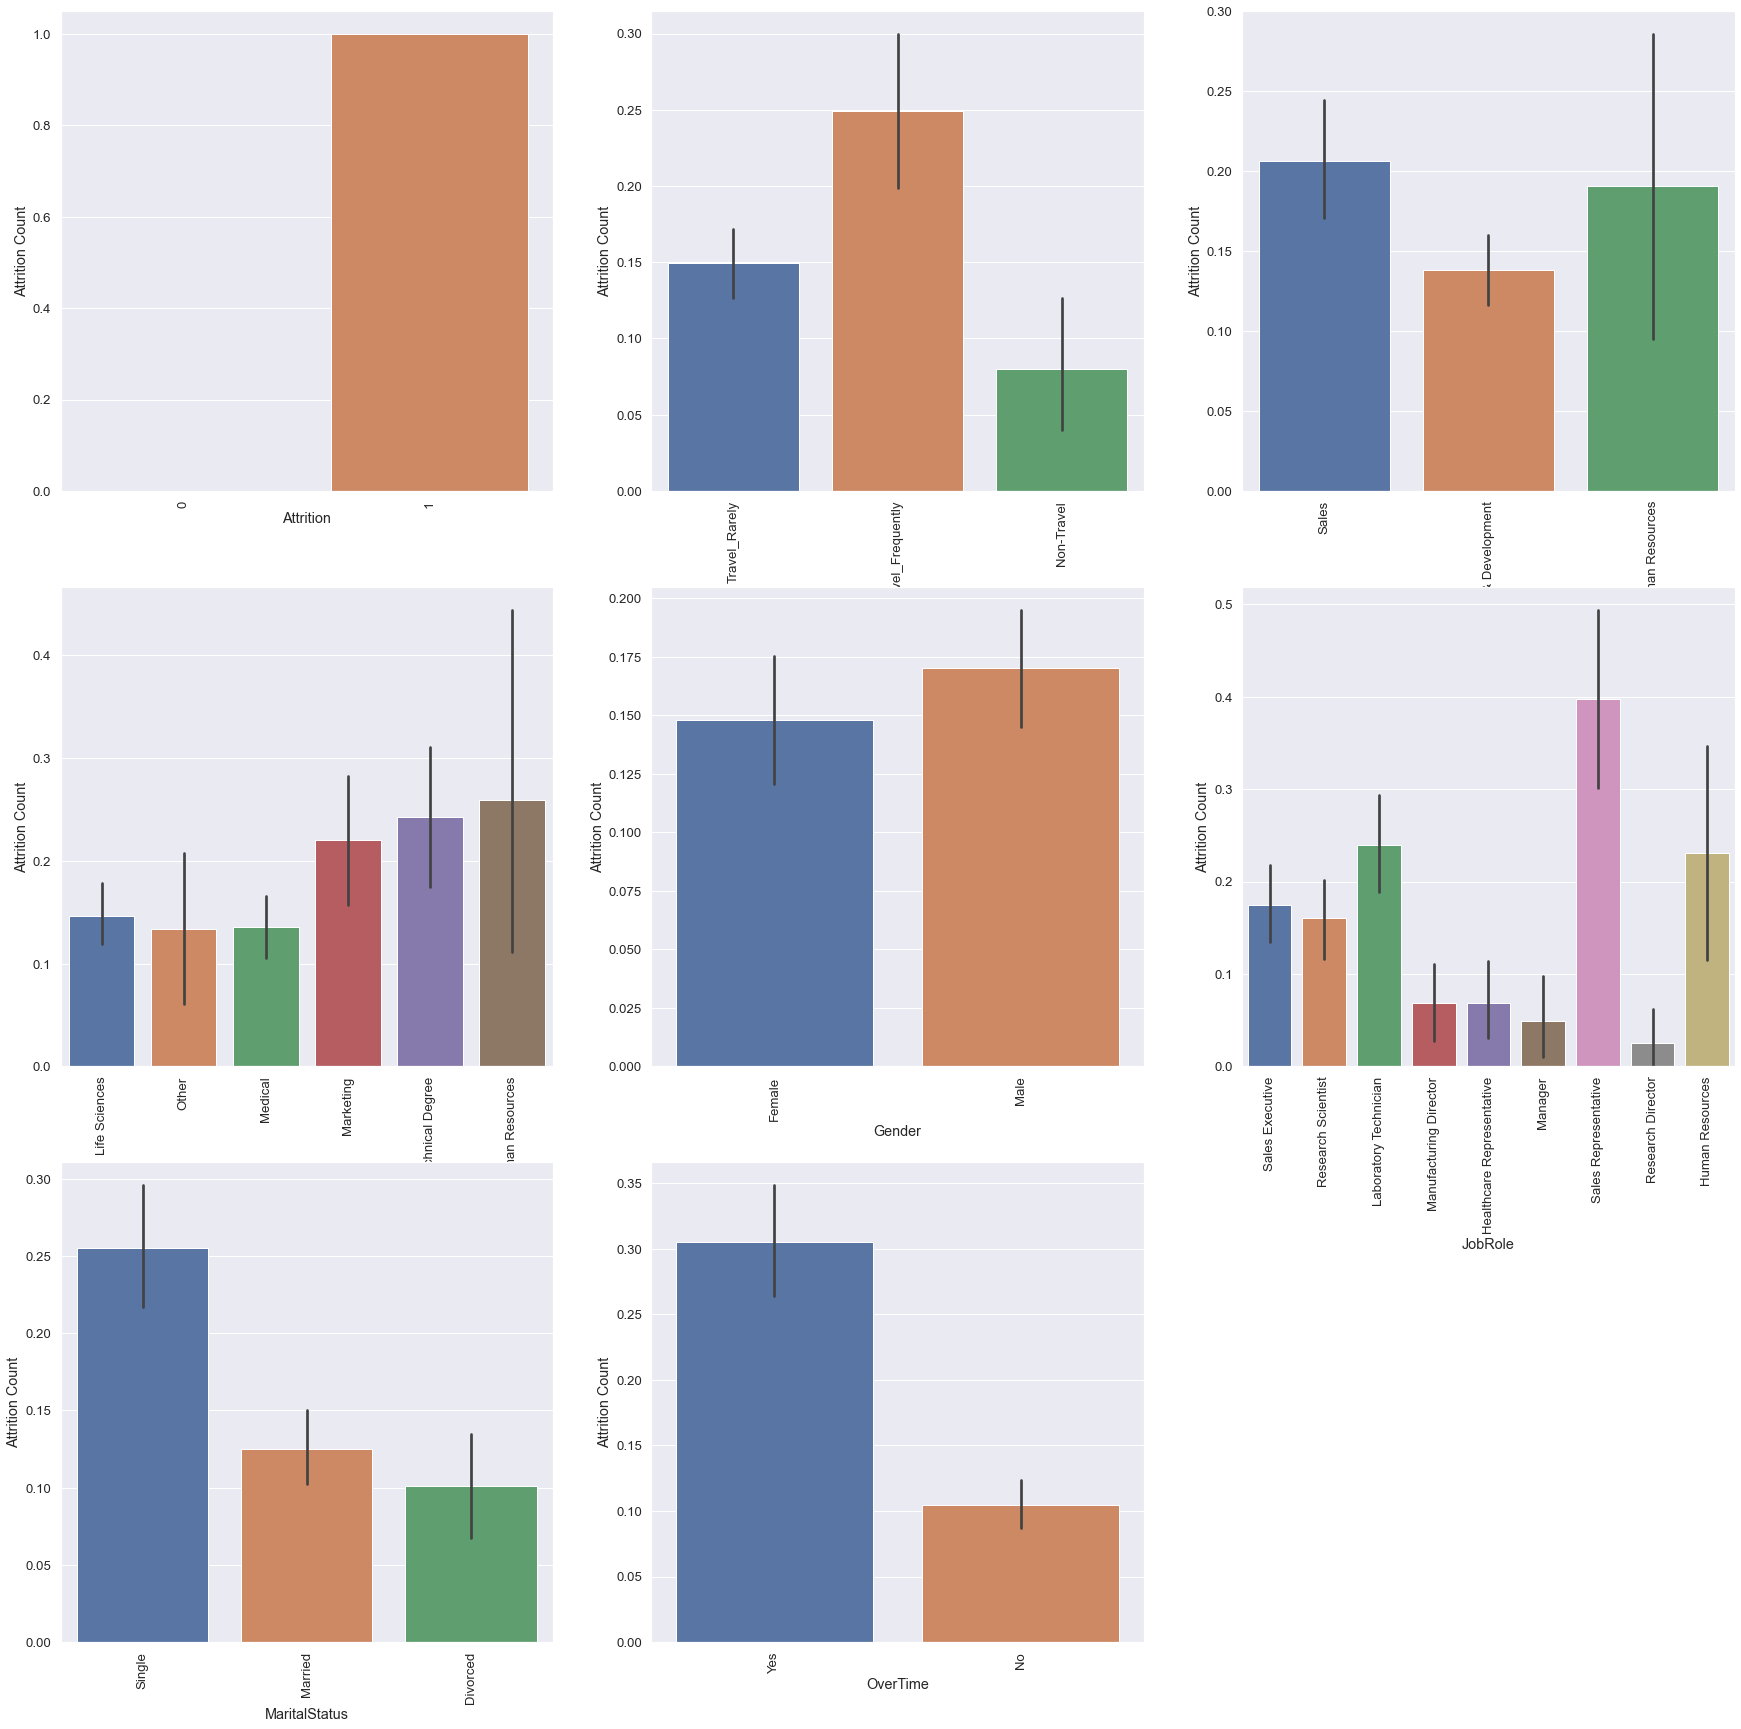

In [17]:
# Plotting how every feature correlate with the "target"
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=att)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- The workers with low  `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit than other employees.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit than the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

## Correlation Matrix

<AxesSubplot:>

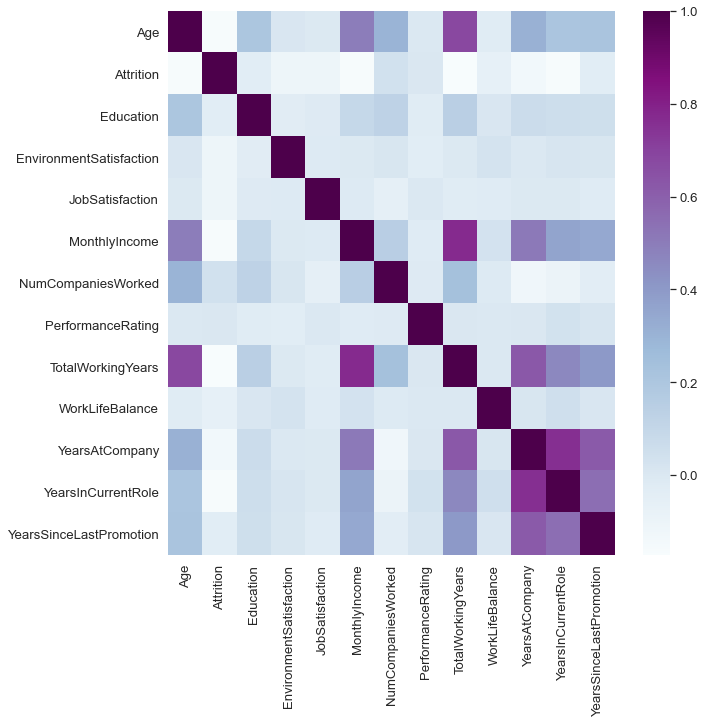

In [18]:
# Using heatmap for better understanding of correlation between each other

plt.figure(figsize=(10,10))
sns.heatmap(att.corr(), cmap='BuPu')

##  **Analysis of correlation results (sample analysis):**

- Monthly income is highly correlated with Total working hours.
- Age is also positively correlated with the Total working hours.

In [19]:
#Now we will make numerical for the categorical variables.
#categorical variables turns into a series of 0 and 1 and so on, making them lot easier to quantify and compare.

att.BusinessTravel.replace({'Non-Travel':0,
                           'Travel_Rarely':1,
                           'Travel_Frequently':2}, inplace=True)

att.Department.replace({'Sales':0,
                        'Human Resources':1,
                        'Research & Development':2}, inplace=True)

att.EducationField.replace({'Other':0,
                            'Human Resources':1,
                            'Technical Degree':2,
                            'Marketing':3,
                            'Medical':4,
                            'Life Sciences':5}, inplace=True)

att.Gender.replace({'Male':1, 'Female':0}, inplace=True)

att.JobRole.replace({'Sales Executive':0,
                     'Human Resources':1,
                     'Sales Representative':2,
                     'Healthcare Representative':3,
                     'Research Director':4,
                     'Manager':5,
                     'Research Scientist':6,
                     'Laboratory Technician':7,
                     'Manufacturing Director':8}, inplace=True)

att.MaritalStatus.replace({'Single':0,
                           'Married':1,
                           'Divorced':2}, inplace=True)

att.OverTime.replace({'Yes':1, 'No':0}, inplace=True)

# Model Building

In [20]:
att.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,1,0,2,5,2,0,0,4,0,5993,8,1,3,8,1,6,4,0
1,49,0,2,2,1,5,3,1,6,2,1,5130,1,0,4,10,3,10,7,1
2,37,1,1,2,2,0,4,1,7,3,0,2090,6,1,3,7,3,0,0,0
3,33,0,2,2,4,5,4,0,6,3,1,2909,1,1,3,8,3,8,7,3
4,27,0,1,2,1,4,1,1,7,2,1,3468,9,0,3,6,3,2,2,2


# Sampling

**Now we will train the model on training dataset and make predictions for the test dataset.**

In [21]:
# We will use the train_test_split function from sklearn to divide our train dataset.
# So, first let us import train_test_split.

In [22]:
features = []
for col in att.columns:
    if col != 'Attrition':
        features.append(col)

target = 'Attrition'

x = att[features]
y = att[target]

In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int8

### Here I uses SMOTE for class balancing

In [24]:
from imblearn.over_sampling import SMOTE   # SMOTE(Synthetic Minority Oversampling Technique)
smote=SMOTE()
x_att,y_att=smote.fit_resample(x,y)

In [25]:
from collections import Counter
print('Before SMOTE:',Counter(y))
print('After SMOTE:',Counter(y_att))

Before SMOTE: Counter({0: 1233, 1: 237})
After SMOTE: Counter({1: 1233, 0: 1233})


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_att, y_att, test_size=0.2)

In [27]:
x_train.head()

,Age,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1405,31,0,2,3,4,3,0,4,3,1,11031,4,0,4,13,4,11,7,4
1173,36,1,2,4,5,2,0,3,1,1,8008,4,0,3,9,3,3,2,0
575,54,1,2,4,4,4,0,8,1,2,5485,9,1,3,9,3,5,3,1
2058,40,1,0,3,4,2,0,0,2,1,7411,3,0,4,12,2,8,6,0
972,18,0,2,3,5,4,0,7,4,0,1611,1,0,3,0,4,0,0,0


In [28]:
y_train.head()

1405    0
1173    0
575     0
2058    1
972     0
Name: Attrition, dtype: int8

### By Using MinMax scaler convert whole data in between 0 to 1 and make data unitless

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [30]:
x_train_scaled=mms.transform(x_train)
x_test_scaled=mms.transform(x_test)

**The dataset has been divided into training and testing part.**

**80% data will use for train the model and rest of the 20% data will use for predict the model.**

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [32]:
log_reg = LogisticRegression()

In [33]:
# Build the model on train

log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [34]:
# Predict the model on test

pred_log_reg = log_reg.predict(x_test_scaled)
pred_log_reg

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [35]:
tab_log_reg = confusion_matrix(pred_log_reg, y_test)
tab_log_reg

array([[196,  50],
       [ 55, 193]], dtype=int64)

In [36]:
TPR_log = 193/(193+50)*100
TPR_log

79.42386831275721

In [38]:
FPR_log = 55/(55+196)*100
FPR_log

21.91235059760956

In [39]:
Precision_log = 193/(193+55)*100
Precision_log

77.82258064516128

In [40]:
Accuracy_log = tab_log_reg.diagonal().sum() / tab_log_reg.sum()*100
Accuracy_log

78.74493927125506

**So our predictions are almost 78% accurate, i.e. we have identified 78% of the Attrition Rate correctly for our logistic regression model.**

## 2. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [42]:
# Build the model on train

dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [43]:
# Predict the model on test

pred_dt = dt.predict(x_test_scaled)
pred_dt

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [44]:
tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[200,  34],
       [ 51, 209]], dtype=int64)

In [45]:
TPR_dt = 209/(209+34)*100
TPR_dt

86.0082304526749

In [46]:
FPR_dt = 51/(51+200)*100
FPR_dt

20.318725099601593

In [47]:
Precision_dt = 209/(209+51)*100
Precision_dt

80.38461538461539

In [48]:
Accuracy_dt = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy_dt

82.79352226720647

**Our predictions are almost 82% accurate, i.e. we have identified 82% of the Attrition Rate correctly for our Decision tree model.**

## 3. Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [50]:
# Build the model on train

rfc.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [51]:
# Predict the model on test

pred_rfc=rfc.predict(x_test_scaled)
pred_rfc

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [52]:
tab_rfc=confusion_matrix(pred_rfc,y_test)
tab_rfc

array([[229,  23],
       [ 22, 220]], dtype=int64)

In [53]:
TPR_rfc = 220/(220+23)*100
TPR_rfc

90.53497942386831

In [54]:
FPR_rfc = 22/(22+229)*100
FPR_rfc

8.764940239043826

In [55]:
Precision_rfc = 220/(220+22)*100
Precision_rfc

90.9090909090909

In [56]:
Accuracy_rfc = tab_rfc.diagonal().sum() / tab_rfc.sum()*100
Accuracy_rfc

90.89068825910931

 **Our predictions are almost 90% accurate, i.e. we have identified 90% of the Attrition Rate correctly for our Random Forest model.**

In [57]:
models = pd.DataFrame({
    'Model': ['logistic Regression', 'Decision Tree','Random Forest'],
    'Accuracy' : [Accuracy_log, Accuracy_dt, Accuracy_rfc],
    'Tpr' : [TPR_log, TPR_dt, TPR_rfc],
    'Fpr' : [FPR_log, FPR_dt, FPR_rfc],
    'Precission' : [Precision_log, Precision_dt, Precision_rfc]
})

In [58]:
models

,Model,Accuracy,Tpr,Fpr,Precission
0,logistic Regression,78.744939,79.423868,21.912351,77.822581
1,Decision Tree,82.793522,86.008230,20.318725,80.384615
2,Random Forest,90.890688,90.534979,8.764940,90.909091


# Important feature

In [59]:
rfc.feature_importances_.sum()

1.0

In [60]:
x_train.columns

Index(['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [61]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Score':rfc.feature_importances_})
feature_importance

,Feature,Score
0,Age,0.072112
1,BusinessTravel,0.014835
2,Department,0.057644
3,Education,0.038501
4,EducationField,0.057735
5,EnvironmentSatisfaction,0.080478
6,Gender,0.017419
7,JobRole,0.044857
8,JobSatisfaction,0.069920
9,MaritalStatus,0.106293


In [62]:
feature_importance.sort_values('Score',ascending=False)

,Feature,Score
10,MonthlyIncome,0.110383
9,MaritalStatus,0.106293
5,EnvironmentSatisfaction,0.080478
0,Age,0.072112
8,JobSatisfaction,0.069920
16,YearsAtCompany,0.060457
4,EducationField,0.057735
2,Department,0.057644
14,TotalWorkingYears,0.057171
17,YearsInCurrentRole,0.054547


<AxesSubplot:>

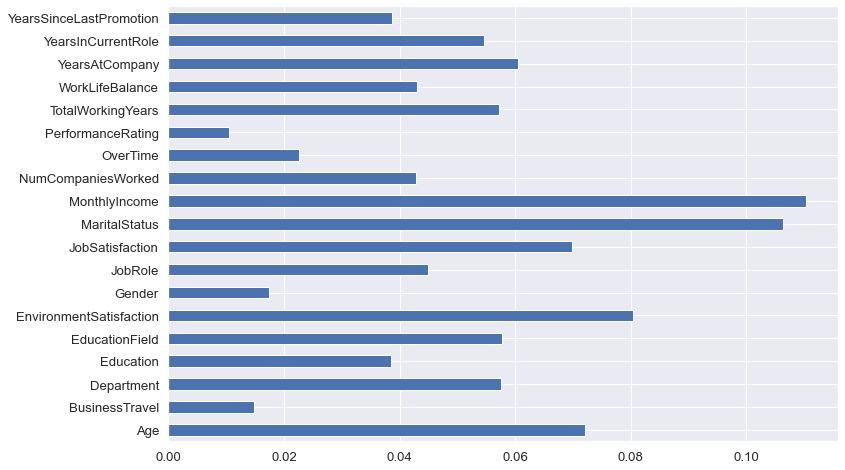

In [63]:
importances = pd.Series(rfc.feature_importances_,index = x_train.columns)
importances.plot(kind='barh', figsize=(12,8))

**We can find out that Monthly Income is most important feature behind employee quit their job.**


**After that Marital Status, EnvironmentSatisfaction, Age and Job Satisfaction are feature are most important.**
